# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [144]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [145]:
iris = datasets.load_iris() #資料讀取
print(iris.DESCR)           #資料集說明

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [146]:
print(iris.keys())          #資籵的key
print(iris["filename"])     #資料位置
print(iris.data[0:10])      #前十筆資炓
print(type(iris.data))      #資料型態
print(iris.target_names)    #樣本名稱
print(iris.target)          #樣本資料

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [147]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [148]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [149]:
print("target_names"+str(iris["target_names"]))

target_names['setosa' 'versicolor' 'virginica']


In [150]:
#建立Target欄位與資料
y = pd.DataFrame(iris["target"], columns=["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [151]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
iris_data = iris_data[["sepal length (cm)","petal length (cm)","target"]]
iris_data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [152]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data["target"].isin([0,1])]
print(iris_data)                                        #只取0和1的筆數
print(iris["data"].size/len(iris["feature_names"]))     #總資料筆數


    sepal length (cm)  petal length (cm)  target
0                 5.1                1.4       0
1                 4.9                1.4       0
2                 4.7                1.3       0
3                 4.6                1.5       0
4                 5.0                1.4       0
..                ...                ...     ...
95                5.7                4.2       1
96                5.7                4.2       1
97                6.2                4.3       1
98                5.1                3.0       1
99                5.7                4.1       1

[100 rows x 3 columns]
150.0


## 切分訓練集與測試集
> train_test_split()

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[["sepal length (cm)","petal length (cm)"]],iris_data["target"],test_size=0.3)

In [154]:
print(X_train.head())
print(X_train.shape)

    sepal length (cm)  petal length (cm)
69                5.6                3.9
19                5.1                1.5
9                 4.9                1.5
21                5.1                1.5
51                6.4                4.5
(70, 2)


In [155]:
print(X_test.head())
print(X_test.shape)

    sepal length (cm)  petal length (cm)
48                5.3                1.5
10                5.4                1.5
32                5.2                1.5
27                5.2                1.5
54                6.5                4.6
(30, 2)


In [156]:
print(Y_train.head())
print(Y_train.shape)

69    1
19    0
9     0
21    0
51    1
Name: target, dtype: int64
(70,)


In [157]:
print(Y_test.head())
print(Y_test.shape)

48    0
10    0
32    0
27    0
54    1
Name: target, dtype: int64
(30,)


## 完整程式 -- 使用Scikit-Learn 完成預測
* 讀取資料&pre-processing
* 切分訓練集與測試集 

In [158]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#讀取資料&pre-processing
iris = datasets.load_iris()
x = pd.DataFrame(iris.data,columns=iris["feature_names"])
y = pd.DataFrame(iris["target"],columns=["target"])
iris.data = pd.concat([x,y],axis=1)
iris.data = iris_data[["sepal length (cm)","petal length (cm)","target"]]
iris.data = iris_data[iris_data["target"].isin([0,1])]
#切分訓練集與測試集 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[["sepal length (cm)","petal length (cm)"]],iris_data["target"],test_size=0.3)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

## Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.
    計算訓練集的平均值和標準差，以便稍後能夠在測試集上重新應用相同的轉換。

In [159]:
from IPython.display import Math
Math(r"X^{(i)}_{norm}=\frac{X^{(i)}-X_{min}}{X_{max}-X_{min}}")

<IPython.core.display.Math object>

In [160]:
Math(r"X^{(i)}_{std}=\frac{X^{(i)}-\mu_{X}}{\sigma_{X}}")

<IPython.core.display.Math object>

In [161]:
def norm_stats(dfs):            #normalization
    minimum = dfs.min()   
    maximum = dfs.max()
    mu = dfs.mean()             #平均值
    sigma = dfs.std()           #標準差
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):        #standarization
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [162]:
#訓練集
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)     #轉成numpy的型式
print(arr_x_train[:5])      #feature_names
print(arr_y_train[:5])      #target

[[ 0.50609938  0.792271  ]
 [ 0.04400864 -1.04276845]
 [ 0.35206913  0.45244888]
 [ 0.35206913  0.86023542]
 [ 0.96819012  1.20005754]]
[1 0 1 1 1]


In [163]:
#測試集
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
arr_y_test = np.array(Y_test)
print(arr_x_test[:5])      #feature_names
print(arr_y_test[:5])      #target

[[ 1.78032895  1.03992329]
 [ 0.51991907  0.8286522 ]
 [ 0.04726537  0.7582285 ]
 [-1.37069574 -1.00236399]
 [ 0.36236784  0.8990759 ]]
[1 1 1 0 1]


## use sklearn

In [164]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.47142857 2.83428571]
[0.64456915 1.46081051]


In [165]:
#訓練集
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
print(X_train_std[:5])


[[ 0.50975358  0.79799144]
 [ 0.0443264  -1.05029756]
 [ 0.35461118  0.4557157 ]
 [ 0.35461118  0.86644659]
 [ 0.97518075  1.20872233]]


The scaler instance can then be used on new data to transform it the same way it did on the training set: <br>
然後，可以將縮放器實例用於新數據，以與在訓練集上執行的方式相同的方式對其進行轉換：

In [166]:
X_test_std = sc.transform(X_test)
print(X_test_std[:5])

[[ 1.75089272  1.07181203]
 [ 0.50975358  0.86644659]
 [ 0.0443264   0.79799144]
 [-1.35195514 -0.91338726]
 [ 0.35461118  0.93490174]]


you can also use fit_transform method (i.e., fit and then transform)    

In [167]:
X_train_std = sc.fit_transform(X_train)  #fit和transform同時做
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:5])


[[ 1.81076413  1.05770105]
 [ 0.52880722  0.84281822]
 [ 0.04807338  0.77119061]
 [-1.39412813 -1.01949966]
 [ 0.36856261  0.91444583]]


In [168]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.4033407908349
29.82712157438893


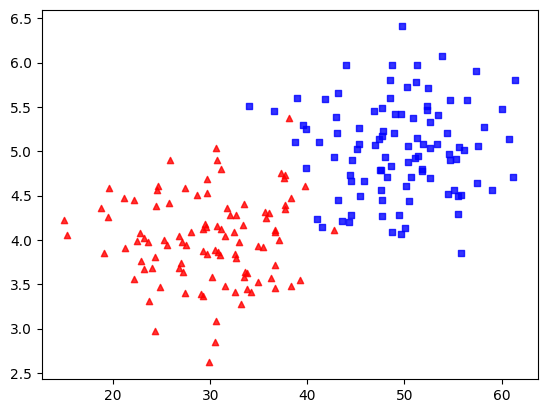

In [169]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [ ]:
x_val = np.concatenate((x1,x2)) #1D
y_val = np.concatenate((y1,y2)) #1D
x_val.shape

(200,)

In [171]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [172]:
minmax_norm(x_val[:10])

array([0.26472056, 0.50416993, 0.55917603, 0.72572398, 0.32631505,
       0.35924633, 0.48603583, 0.        , 0.75927186, 1.        ])

## use sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)                  #1D
x_val=x_val.reshape(-1, 1)          #1D->2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
[61.39980609]
[14.95907749]
[[0.60488068]
 [0.73219356]
 [0.76143976]
 [0.84999166]
 [0.63762986]
 [0.6551391 ]
 [0.72255183]
 [0.46413136]
 [0.86782874]
 [0.99582153]]
